In [40]:
import sys; sys.path.insert(0, '/home/adriano/rtree')
from rtree_lightning import generate_data, compute_hits, compute_hits_rtree
import timeit
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import timeit

In [2]:
grid, points = generate_data()

The function generate_data took 0.5029226409969851 seconds to complete.


In [3]:
grid.head()

,geometry
0,"POLYGON ((0.00000 10.00000, 10.00000 10.00000,..."
1,"POLYGON ((10.00000 10.00000, 20.00000 10.00000..."
2,"POLYGON ((20.00000 10.00000, 30.00000 10.00000..."
3,"POLYGON ((30.00000 10.00000, 40.00000 10.00000..."
4,"POLYGON ((40.00000 10.00000, 50.00000 10.00000..."


In [4]:
points.head()

,x,y,geometry
0,47.165909,61.685717,POINT (47.16591 61.68572)
1,30.460201,57.384898,POINT (30.46020 57.38490)
2,68.563975,49.703944,POINT (68.56397 49.70394)
3,14.467869,17.283633,POINT (14.46787 17.28363)
4,50.042627,6.212348,POINT (50.04263 6.21235)


In [5]:
# normal_time = list()
# rtree_time = list()

# for i in range(20):
#     start_execution_time = timeit.default_timer()
#     _ = compute_hits(grid, points)
#     end_execution_time = timeit.default_timer()
#     normal_time.append(end_execution_time-start_execution_time)
    
#     start_execution_time = timeit.default_timer()
#     _ = compute_hits_rtree(grid, points)
#     end_execution_time = timeit.default_timer()
#     rtree_time.append(end_execution_time-start_execution_time)
    
# _, ax = plt.subplots()
# _ = ax.boxplot([normal_time, rtree_time])
# ax.set_title("Comparation with 100 points")
# ax.set_xticklabels(['Default', 'R-tree'])

20

In [ ]:
n_samples = [10, 20, 100, 1000, 10000, 100000]
resolutions = [5, 10]
upper_limits = [100]

results = list()
for upper_limit in upper_limits:
    for resolution in resolutions:
        for n_sample in n_samples:
            rtree_name = 'rtree_grid_ul%s_re%s_ns%s.png'%(str(upper_limit).zfill(6), 
                         str(resolution).zfill(6), 
                         str(n_sample).zfill(6))
            normal_name = 'normal_grid_ul%s_re%s_ns%s.png'%(str(upper_limit).zfill(6), 
                         str(resolution).zfill(6), 
                         str(n_sample).zfill(6))
            
            result = dict(normal=list(), rtree=list())
            params = dict(upper_limit=upper_limit, resolution=resolution,
                         n_samples=n_sample)
            
            for i in range(10):
                grid, points = generate_data(**params)
                
                start = timeit.default_timer()
                df_ref = compute_hits(grid, points)
                end = timeit.default_timer()
                result['normal'].append(end-start)
                
                start = timeit.default_timer()
                df_ref = compute_hits_rtree(grid, points)
                end = timeit.default_timer()
                result['rtree'].append(end-start)
                
            result = dict(**params, **result)
            results.append(result)
            

The function generate_data took 2.4461094440048328 seconds to complete.
The function compute_hits took 0.7769752009917283 seconds to complete.
The function compute_hits_rtree took 4.796666385998833 seconds to complete.
The function generate_data took 2.327370841987431 seconds to complete.
The function compute_hits took 0.8662108120042831 seconds to complete.
The function compute_hits_rtree took 4.854836137994425 seconds to complete.
The function generate_data took 2.3247182329942007 seconds to complete.
The function compute_hits took 0.853061344998423 seconds to complete.
The function compute_hits_rtree took 4.836631601996487 seconds to complete.
The function generate_data took 2.3799982589989668 seconds to complete.
The function compute_hits took 1.2664058899972588 seconds to complete.
The function compute_hits_rtree took 4.793256326011033 seconds to complete.
The function generate_data took 2.5072221250011353 seconds to complete.
The function compute_hits took 0.8027816719986731 seco

The function compute_hits_rtree took 5.018298848008271 seconds to complete.
The function generate_data took 2.466468357000849 seconds to complete.
The function compute_hits took 75.34575927800324 seconds to complete.
The function compute_hits_rtree took 4.531278491005651 seconds to complete.
The function generate_data took 2.3859148219926283 seconds to complete.
The function compute_hits took 83.67334382201079 seconds to complete.
The function compute_hits_rtree took 4.520387919998029 seconds to complete.
The function generate_data took 3.1897815669944976 seconds to complete.
The function compute_hits took 880.2337567639916 seconds to complete.
The function compute_hits_rtree took 8.343662913001026 seconds to complete.
The function generate_data took 3.640275115001714 seconds to complete.
The function compute_hits took 778.8566446009936 seconds to complete.
The function compute_hits_rtree took 7.185092359999544 seconds to complete.
The function generate_data took 3.2922693739965325 sec

In [45]:
results[0]

{'upper_limit': 100,
 'resolution': 2,
 'n_samples': 10,
 'normal': [2.860068837995641,
  2.595401207989198,
  3.7126728689909214,
  3.863931184998364,
  4.340829310007393,
  5.558256404998247,
  5.163890249008546,
  2.3498855420039035,
  2.2582366620044922,
  3.177470232010819],
 'rtree': [19.67630472900055,
  17.017150420011603,
  17.85263414400106,
  25.809548632008955,
  25.775168841995765,
  26.465262495999923,
  19.464597149999463,
  16.143502649007132,
  16.478046807009378,
  16.111038996998104]}

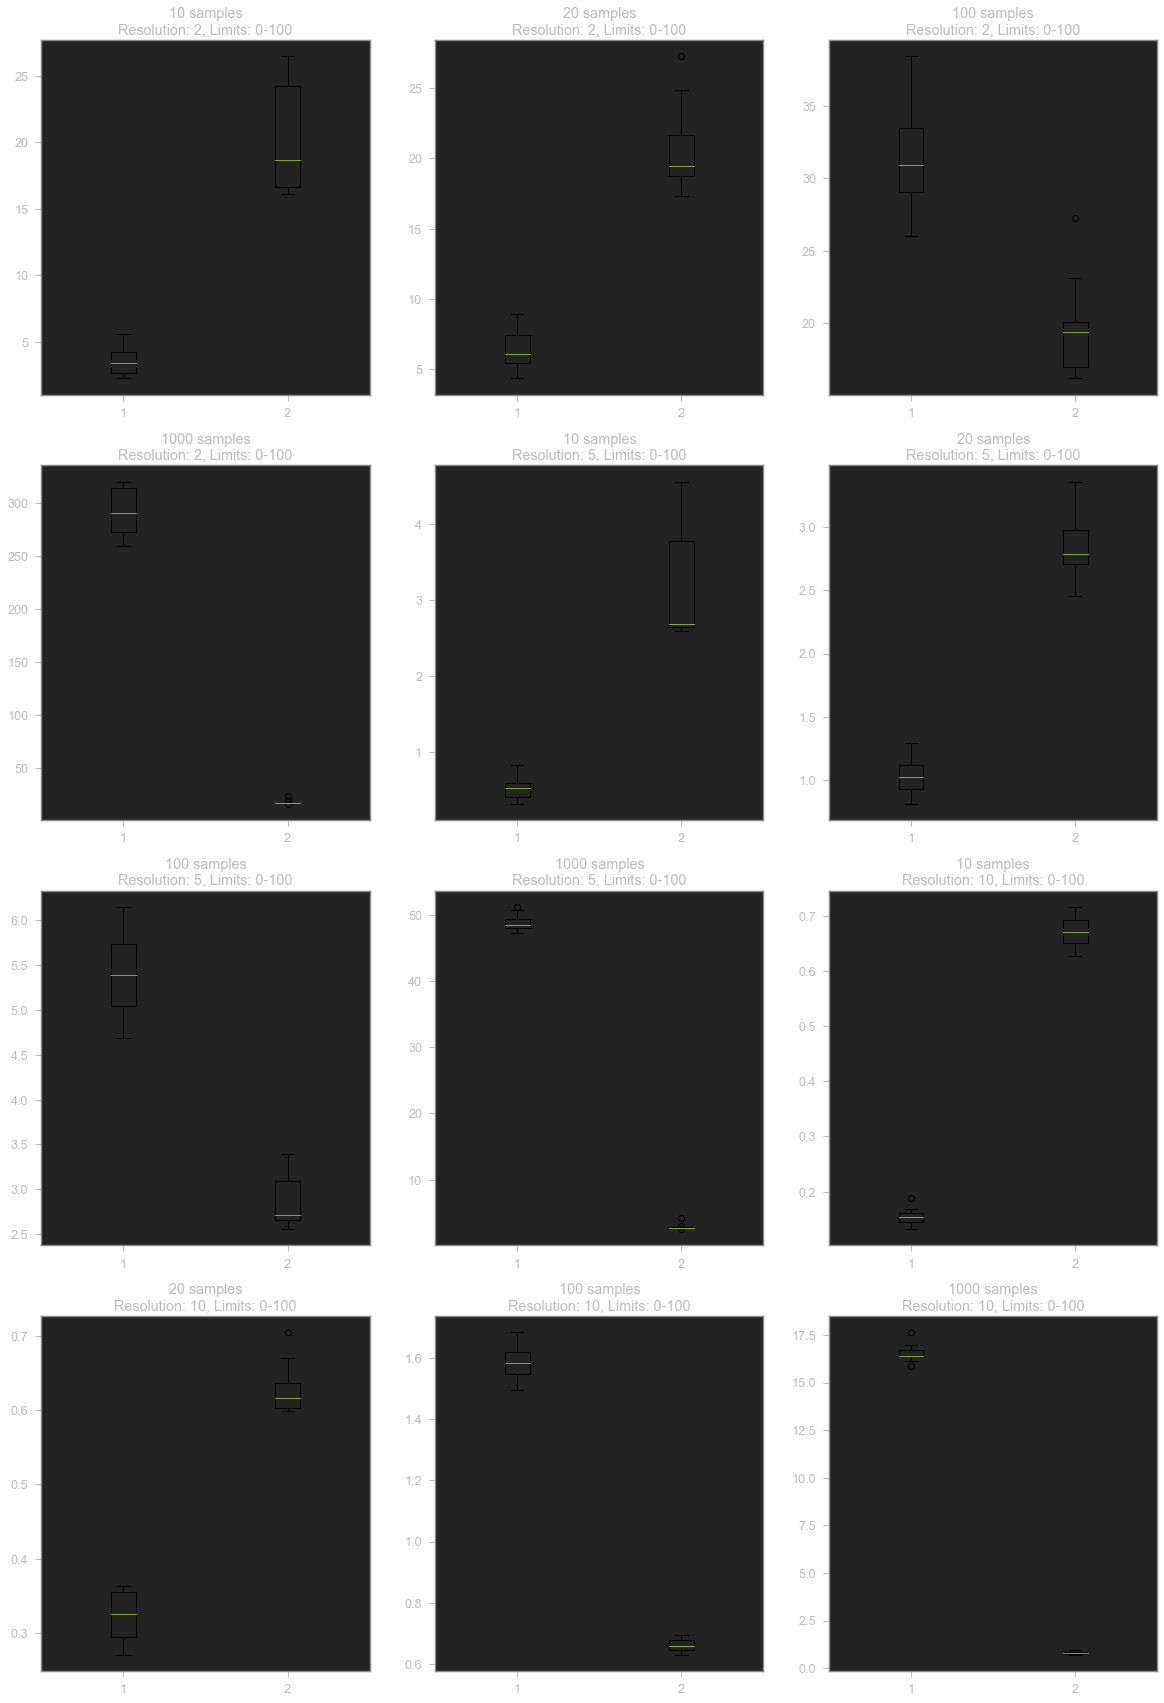

In [72]:
res = results
fig, axs = plt.subplots(4, 3, figsize=(20, 30))

for i, ax in enumerate(axs.flat):
    info = [results[i]['n_samples'], results[i]['resolution'],
            results[i]['upper_limit']]
    ax.set_title('%d samples\nResolution: %d, Limits: 0-%d'%(*info, ))
    ax.boxplot([results[i]['normal'], results[i]['rtree']])
plt.savefig('summary.png', dpi=100, bbox_inches='tight', transparent=False, 
            pad_inches=0.1)